# Machine Learning Project

#### Step 0: Import Libraries

In [3]:
import copy
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, f1_score

#### Submission Flag

In [4]:
submission = True
team_id = 49
split = 'test_public' # replace by 'test_private' for FINAL submission

#### Step 1: Load Data

In [9]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test_public.csv')

missing_codes = [-2, -7, -8, -9]
inapplicable_code = [-1]

train_data["RACE"] = LabelEncoder().fit_transform(train_data["RACE"])
le_utilization = LabelEncoder()
train_data["UTILIZATION"] = le_utilization.fit_transform(train_data["UTILIZATION"]) # maybe remove label encoding not needed for sci-kit learn

dropped_features = ["TOT_MED_EXP", "UTILIZATION"]

# Categorical Features
categorical_features = ["RACE", "SEX", "REGION", "MARITAL_STAT", "SPOUSE_PRSNT", "STUDENT_STAT",
                        "UNION_STAT", "EMPLYMT", "OCCUP", "NON_ENG_LANG", "TAX_FORM_TYP",
                        "MIL_ACTIV_DUTY", "HON_DISCHARGE", "DISPSN_STAT",
                        "INSUR_COV", "EMPLYR_INS",
                        "PROB_BILL_PAY", "DELAY_PRESCR_MED", "UNABL_PRES_MED",
                        "PENSN_PLAN", "NO_WORK_WHY",
                        "WALK_LIM", "ACTIV_LIM", "SOCIAL_LIM", "COGNTV_LIM", "SCHOOL_LIM", "HOUSEWRK_LIM",
                        "ADV_NO_FAT_FOOD", "ADV_EXERCISE_MORE", "ADV_DNTL_CKP", "ADV_BOOST_SEAT", "ADV_NO_SMKG",
                        "ADV_LAP_BLT", "ADV_EAT_HLTHY",
                        "RSN_NO_DNTL_CKP", "RSN_NO_MED_CKP",
                        "DOC_CK_BP", "DOC_TIM_ALN", "TAKE_RISK", "FEEL_DEPRS", "WEAR_SEATBLT",
                        "APPT_REG_MEDCARE", "LOST_ALL_TEETH", "ASPRN_REG",
                        "MULT_HIGHBP", "DIAB_KIDNY", "DIAB_INSLN", "DIAB_MED",
                        "CHRON_BRONCH", "JNT_PAIN", "PREGNT", "DEAF", "BLIND", "HEAR_AID",
                        "HIGH_BP_DIAG", "COR_HRT_DIAG", "ANGINA_DIAG", "HRT_ATT_DIAG", "OTH_HRT_DIAG", "STROKE_DIAG",
                        "EMPHYM_DIAG", "HIGHCHOL_DIAG", "CANCER_DIAG", "DIAB_DIAG", "ARTHR_DIAG", "ARTHR_TYPE",
                        "ASTHM_DIAG", "ADHD_DIAG",
                        "DIFF_ERRND_ALN", "DIFFIC_HEAR", "DIFFIC_SEE", "SMOK"]

# Discrete Features
discrete_features = ["POVRTY_CAT", "EDU_DEG", "PROB_WKIDS", "PROB_WBHV", "HEALTH_STAT", "MENTAL_HLTH", "FREQ_DNTL_CKP",
                     "WHEN_ADV_BOOST_SEAT", "WHEN_ADV_LAP_BLT", "WHEN_LST_ASTHMA", "WHEN_ADV_EXERCISE", "LAST_FLU_VAC",
                     "LAST_REG_CKP", "TIME_LAST_PSA", "OVR_FEEL_14", "OVR_FEEL_30",
                     "AGE", "AGE_DIAG_ADHD", "NUM_PRESCR_MEDS", "CHILD_SUPP",
                     "EDU_YRS", "DAYS_CAREOTHR_NOWORK", "DAYS_ILL_NOSCHL", "DAYS_ILL_NOWORK",
                     "FOOD_STMP_MNTHS", "FOOD_STMP_VAL", "NUM_DEP_OUT_REP_UNT"]

# Continuous Features
continuous_features = ["BM_IDX", "FAM_INCOME", "TOT_INCOME", "POVRTY_LEV", "PUB_ASST",
                       "MENTAL_HLTH_SCR", "PHY_HLTH_SCR"]

# Convert categorical features
train_data[categorical_features] = train_data[categorical_features].astype('category')
# Convert discrete features
train_data[discrete_features] = train_data[discrete_features].astype('int')
# Convert continuous features
train_data[continuous_features] = train_data[continuous_features].astype('float')

train_data.info()
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 110 entries, RACE to UTILIZATION
dtypes: category(72), float64(8), int64(30)
memory usage: 5.4 MB


,RACE,SEX,PANEL,WEIGHT,STUDENT_STAT,MIL_ACTIV_DUTY,HON_DISCHARGE,HEALTH_STAT,MENTAL_HLTH,CHRON_BRONCH,...,NUM_PRESCR_MEDS,DIFFIC_HEAR,DIFFIC_SEE,SMOK,OVR_FEEL_14,MENTAL_HLTH_SCR,PHY_HLTH_SCR,OVR_FEEL_30,TOT_MED_EXP,UTILIZATION
0,0,1,19,7205.036720,-1,2,2,2,2,2,...,0,2,2,2,1,43.82,61.41,3,0,1
1,1,1,20,5501.113581,-1,4,2,1,1,2,...,12,2,2,2,0,60.12,54.80,0,240,1
2,1,1,20,16797.708379,-1,4,1,3,1,2,...,20,2,2,2,0,60.35,30.08,0,791,1
3,0,2,19,3605.218411,-1,2,2,3,3,2,...,20,2,2,2,0,58.32,50.22,0,272,1
4,0,1,19,11223.127404,1,2,2,1,2,2,...,3,2,2,2,0,62.39,56.71,0,1264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,19,19429.034502,-1,2,2,2,2,2,...,0,2,2,2,0,58.15,52.91,0,0,1
14996,0,2,19,2808.751509,-1,2,2,4,3,2,...,1,2,2,2,-9,60.29,52.11,-9,4,1
14997,0,2,20,12237.098636,-1,2,2,2,3,2,...,0,2,2,2,3,22.14,67.11,10,0,1
14998,0,2,20,5370.704372,-1,2,2,3,3,2,...,0,2,2,-1,-1,-1.00,-1.00,-1,600,1


#### Step 2: Split Data

In [10]:
if submission:
    # Use the entire training data for training and validation
    X_train_class = train_data.drop(dropped_features, axis=1)
    y_train_class = train_data['UTILIZATION']
    
    X_train_reg = train_data.drop(dropped_features, axis=1)
    y_train_reg = train_data['TOT_MED_EXP']
    
    # Use the test_data directly for final predictions
    X_test_class = test_data.copy(deep=True)
    X_test_reg = test_data.copy(deep=True)
    
    # Optionally, you could create a validation set from the training data
    X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, test_size=0.2, random_state=42)
    X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=42)
    
else:
    # Perform a full split into training, validation, and test sets
    X_class = train_data.drop(dropped_features, axis=1)
    y_class = train_data['UTILIZATION']
    
    X_reg = train_data.drop(dropped_features, axis=1)
    y_reg = train_data['TOT_MED_EXP']
    
    # Initial split into training and test sets
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    
    # Further split the training data into training and validation sets
    X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, test_size=0.25, random_state=42)
    X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.25, random_state=42)
    # 0.25 * 0.8 = 0.2 of the original data goes to validation


#### Step 3: Data Preprocessing

##### Step 3a: One-Hot Encoding for Categorical Features

In [11]:
# One Hot Encoding for all categorical features on the training set
X_train_class = pd.get_dummies(X_train_class, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)
X_train_reg = pd.get_dummies(X_train_reg, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)

# One Hot Encoding for the validation and test sets
X_val_class = pd.get_dummies(X_val_class, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)
X_val_reg = pd.get_dummies(X_val_reg, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)
X_test_class = pd.get_dummies(X_test_class, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)
X_test_reg = pd.get_dummies(X_test_reg, columns=categorical_features, prefix_sep='__', drop_first=True, dtype=int)

# Align the test and validation sets to ensure it has the same columns as the training set
# For classification
missing_cols_class = set(X_train_class.columns) - set(X_test_class.columns)
for col in missing_cols_class:
    X_val_class[col] = 0
    X_test_class[col] = 0
X_val_class = X_val_class[X_train_class.columns]
X_test_class = X_test_class[X_train_class.columns]

# For regression
missing_cols_reg = set(X_train_reg.columns) - set(X_test_reg.columns)
for col in missing_cols_reg:
    X_val_reg[col] = 0
    X_test_reg[col] = 0
X_val_reg = X_val_reg[X_train_reg.columns]
X_test_reg = X_test_reg[X_train_reg.columns]

# Get new categorical features after one hot encoding
categorical_features = [col for col in X_train_class.columns if '__' in col]

print(f"Number of categorical features: {len(categorical_features)}")
print(f"Number of discrete features: {len(discrete_features)}")
print(f"Number of continuous features: {len(continuous_features)}")


Number of categorical features: 297
Number of discrete features: 27
Number of continuous features: 7


/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/1228849407.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_class[col] = 0
/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/1228849407.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_class[col] = 0
/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/1228849407.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

##### Step 3b: Indicator Features for Missing Values in Discrete and Continuous Features

In [12]:
discrete_features_missing = []
continuous_features_missing = []
discrete_features_inapplicable = []
continuous_features_inapplicable = []
    
def add_indicator_features(X_train, X_val, X_test):
    # Create indicator columns for missing and inapplicable values in discrete and continuous features
    for column in X_train.columns:
        if X_train[column].isin(missing_codes).any():
            X_train[column + '__missing'] = X_train[column].isin(missing_codes).astype(int)
            print(f"{column} has missing: {X_train[column].isin(missing_codes).sum()}")
            if column in discrete_features:
                discrete_features_missing.append(column + '__missing')
            elif column in continuous_features:
                continuous_features_missing.append(column + '__missing')
        if X_train[column].isin(inapplicable_code).any():
            X_train[column + '__inapplicable'] = X_train[column].isin(inapplicable_code).astype(int)
            print(f"{column} has inapplicable: {X_train[column].isin(inapplicable_code).sum()}")
            if column in discrete_features:
                discrete_features_inapplicable.append(column + '__inapplicable')
            elif column in continuous_features:
                continuous_features_inapplicable.append(column + '__inapplicable')

    # Apply the same transformation to the test and validation sets
    for column in X_test.columns:
        if column + '__missing' in discrete_features_missing or column + '__missing' in continuous_features_missing:
            X_test[column + '__missing'] = X_test[column].isin(missing_codes).astype(int)
        if column + '__inapplicable' in discrete_features_inapplicable or column + '__inapplicable' in continuous_features_inapplicable:
            X_test[column + '__inapplicable'] = X_test[column].isin(inapplicable_code).astype(int)
    
    for column in X_val.columns:
        if column + '__missing' in discrete_features_missing or column + '__missing' in continuous_features_missing:
            X_val[column + '__missing'] = X_val[column].isin(missing_codes).astype(int)
        if column + '__inapplicable' in discrete_features_inapplicable or column + '__inapplicable' in continuous_features_inapplicable:
            X_val[column + '__inapplicable'] = X_val[column].isin(inapplicable_code).astype(int)
            
    return X_train, X_val, X_test


# Preprocess the classification data
X_train_class, X_val_class, X_test_class = add_indicator_features(X_train_class, X_val_class, X_test_class)
# Preprocess the regression data
X_train_reg, X_val_reg, X_test_reg = add_indicator_features(X_train_reg, X_val_reg, X_test_reg)

X_train_class

HEALTH_STAT has missing: 11
MENTAL_HLTH has missing: 9
FREQ_DNTL_CKP has missing: 168
NUM_DEP_OUT_REP_UNT has missing: 5
NUM_DEP_OUT_REP_UNT has inapplicable: 11686
WHEN_ADV_BOOST_SEAT has inapplicable: 11999
AGE_DIAG_ADHD has missing: 1
AGE_DIAG_ADHD has inapplicable: 11967
PROB_WKIDS has missing: 1
PROB_WKIDS has inapplicable: 11892
PROB_WBHV has missing: 1
PROB_WBHV has inapplicable: 11892
EDU_DEG has missing: 86
EDU_DEG has inapplicable: 5471
FOOD_STMP_MNTHS has missing: 20
FOOD_STMP_MNTHS has inapplicable: 10042
FOOD_STMP_VAL has missing: 70
FOOD_STMP_VAL has inapplicable: 10043
WHEN_ADV_LAP_BLT has inapplicable: 11958
EDU_YRS has missing: 83
EDU_YRS has inapplicable: 5471
WHEN_LST_ASTHMA has missing: 8
WHEN_LST_ASTHMA has inapplicable: 11781
TIME_LAST_PSA has missing: 369
TIME_LAST_PSA has inapplicable: 8801
DAYS_CAREOTHR_NOWORK has missing: 208
DAYS_CAREOTHR_NOWORK has inapplicable: 10234
WHEN_ADV_EXERCISE has inapplicable: 11954
LAST_FLU_VAC has missing: 419
LAST_REG_CKP has mi

/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/824563036.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[column + '__inapplicable'] = X_train[column].isin(inapplicable_code).astype(int)
/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/824563036.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[column + '__inapplicable'] = X_train[column].isin(inapplicable_code).astype(int)
/var/folders/_k/xv0m9bhx30g3vf97bj668zn40000gn/T/ipykernel_9511/824563036.py:10: PerformanceWarning: D

,PANEL,WEIGHT,HEALTH_STAT,MENTAL_HLTH,AGE,POVRTY_CAT,TOT_INCOME,BM_IDX,FREQ_DNTL_CKP,NUM_DEP_OUT_REP_UNT,...,DAYS_ILL_NOSCHL__missing,DAYS_ILL_NOSCHL__inapplicable,OVR_FEEL_14__missing,OVR_FEEL_14__inapplicable,MENTAL_HLTH_SCR__missing,MENTAL_HLTH_SCR__inapplicable,PHY_HLTH_SCR__missing,PHY_HLTH_SCR__inapplicable,OVR_FEEL_30__missing,OVR_FEEL_30__inapplicable
9839,19,4979.703734,1,1,47,4,52409.0,24.1,4,-1,...,0,1,0,0,0,0,0,0,0,0
9680,19,6017.492189,1,3,28,4,28000.0,28.3,3,-1,...,0,1,0,0,0,0,0,0,0,0
7093,19,5608.133271,2,2,85,1,5400.0,24.4,4,-1,...,0,1,0,0,0,0,0,0,0,0
11293,20,2032.454693,2,2,26,2,23000.0,31.6,3,-1,...,0,1,0,0,0,0,0,0,0,0
820,19,16166.421713,2,2,43,5,198651.0,23.2,3,-1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,20,22010.003946,2,1,26,4,39000.0,23.1,1,-1,...,0,1,0,1,0,1,0,1,0,1
13418,19,24941.073377,4,4,77,5,102901.0,38.5,1,-1,...,0,1,0,0,0,0,0,0,0,0
5390,19,2935.017236,2,3,52,1,0.0,29.3,4,-1,...,0,1,0,0,0,0,0,0,0,0
860,20,4153.502085,1,1,35,4,15000.0,26.2,4,-1,...,0,1,0,0,0,0,0,0,0,0


##### Step 3c: Impute Missing Values

In [7]:
from sklearn.impute import KNNImputer, SimpleImputer

# Replace inapplicable values with 0 and missing values with NaN
# For classification
X_train_class.replace(missing_codes, np.nan, inplace=True)
X_val_class.replace(missing_codes, np.nan, inplace=True)
X_test_class.replace(missing_codes, np.nan, inplace=True)
# For regression
X_train_reg.replace(missing_codes, np.nan, inplace=True)
X_val_reg.replace(missing_codes, np.nan, inplace=True)
X_test_reg.replace(missing_codes, np.nan, inplace=True)

# Replace missing values using k-Nearest Neighbors Imputer for discrete and continuous features
def impute_missing_values(X_train, X_val, X_test, n_neighbors):
    # Impute missing values for discrete features using SimpleImputer and the most frequent strategy
    imputer_discrete = SimpleImputer(strategy='most_frequent')
    X_train[discrete_features] = imputer_discrete.fit_transform(X_train[discrete_features])
    X_val[discrete_features] = imputer_discrete.transform(X_val[discrete_features])
    X_test[discrete_features] = imputer_discrete.transform(X_test[discrete_features])

    # Impute missing values for continuous features
    imputer_continuous = KNNImputer(n_neighbors=n_neighbors, weights='uniform')
    X_train[continuous_features] = imputer_continuous.fit_transform(X_train[continuous_features])
    X_val[continuous_features] = imputer_continuous.transform(X_val[continuous_features])
    X_test[continuous_features] = imputer_continuous.transform(X_test[continuous_features])

    return X_train, X_val, X_test

# Apply the function to the classification data
X_train_class, X_val_class, X_test_class = impute_missing_values(X_train_class, X_val_class, X_test_class, 50)

# Apply the function to the regression data
X_train_reg, X_val_reg, X_test_reg = impute_missing_values(X_train_reg, X_val_reg, X_test_reg, 10)

print(f"Number of missing values in classification data: {X_train_class.isin(missing_codes+inapplicable_code).sum().sum()}")
print(f"Number of missing values in regression data: {X_train_reg.isin(missing_codes+inapplicable_code).sum().sum()}")

Number of missing values in classification data: 167689
Number of missing values in regression data: 167689


##### Step 3d: Outlier Detection and Removal

In [49]:
# # Use IQR method to detect and remove outliers
# def remove_outliers_iqr(X_train, y_train, scale=1.5):
#     for feature in continuous_features:
#         Q1 = X_train[feature].quantile(0.25)
#         Q3 = X_train[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - scale * IQR
#         upper_bound = Q3 + scale * IQR
#         outliers = X_train[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)].index
#         X_train_tmp = X_train.drop(outliers, inplace=False)
#         y_train_tmp = y_train.drop(outliers, inplace=False)
#         print(f"Removed {len(outliers)} outliers from {feature}")
#         
#     return X_train_tmp, y_train_tmp
#         

Scale: 1.0
Removed 712 outliers from BM_IDX
Removed 951 outliers from FAM_INCOME
Removed 1094 outliers from TOT_INCOME
Removed 1009 outliers from POVRTY_LEV
Removed 112 outliers from PUB_ASST
Removed 1861 outliers from MENTAL_HLTH_SCR
Removed 1785 outliers from PHY_HLTH_SCR
[LightGBM] [Info] Number of positive: 7880, number of negative: 2335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 10215, number of used features: 236
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.771415 -> initscore=1.216316
[LightGBM] [Info] Start training from score 1.216316
Scale: 1.2
Removed 545 outliers from BM_IDX
Removed 784 outliers from FAM_INCOME
Removed 911 outliers from TOT_INCOME
Removed 836 outliers from POVRTY_LEV
Removed 112 out

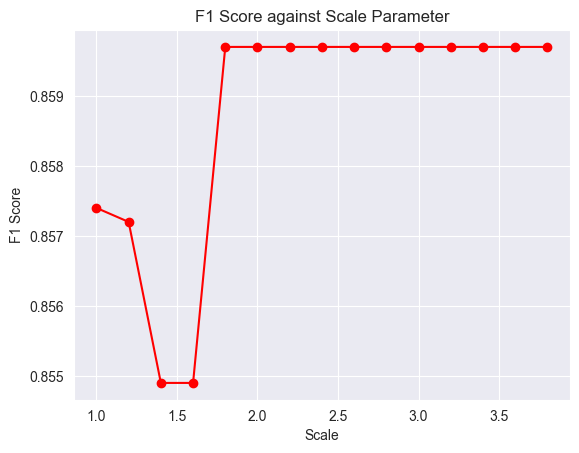

In [50]:
# from lightgbm import LGBMClassifier
# # use validation to tune the scale parameter
# f1_scores = {}
# for i in np.arange(1, 4, 0.2):
#     print(f"Scale: {i}")
#     X_train_tmp, y_train_tmp = remove_outliers_iqr(X_train_class.copy(deep=True), y_train_class.copy(deep=True), i)
#     clf = LGBMClassifier()
#     clf.fit(X_train_tmp, y_train_tmp)
#     y_pred_class = clf.predict(X_val_class)
#     f1 = f1_score(y_val_class, y_pred_class, average='weighted')
#     f1 = round(f1, 4)
#     f1_scores[i] = f1
#     
#     
# # Plot the F1 scores against the scale parameter
# plt.plot(f1_scores.keys(), f1_scores.values(), 'ro-')
# plt.xlabel('Scale')
# plt.ylabel('F1 Score')
# plt.title('F1 Score against Scale Parameter')
# plt.show()

In [ ]:
# # print best f1 score and scale parameter
# best_scale = max(f1_scores, key=f1_scores.get)
# print(f"Best F1 Score: {f1_scores[best_scale]}")
# print(f"Best Scale Parameter: {best_scale}")
# 
# # print dict
# f1_scores

In [43]:
# print("Classification Data")
# remove_outliers_iqr(X_train_class, y_train_class, 2)
# print("Regression Data")
# remove_outliers_iqr(X_train_reg, y_train_reg, 2)

Classification Data
Removed 176 outliers from BM_IDX
Removed 366 outliers from FAM_INCOME
Removed 431 outliers from TOT_INCOME
Removed 388 outliers from POVRTY_LEV
Removed 112 outliers from PUB_ASST
Removed 1759 outliers from MENTAL_HLTH_SCR
Removed 0 outliers from PHY_HLTH_SCR
Regression Data
Removed 176 outliers from BM_IDX
Removed 366 outliers from FAM_INCOME
Removed 431 outliers from TOT_INCOME
Removed 388 outliers from POVRTY_LEV
Removed 112 outliers from PUB_ASST
Removed 1759 outliers from MENTAL_HLTH_SCR
Removed 0 outliers from PHY_HLTH_SCR


Removed 167 outliers from BM_IDX
Removed 294 outliers from FAM_INCOME
Removed 227 outliers from TOT_INCOME
Removed 196 outliers from POVRTY_LEV
Removed 97 outliers from PUB_ASST
Removed 0 outliers from MENTAL_HLTH_SCR
Removed 0 outliers from PHY_HLTH_SCR
Removed 167 outliers from BM_IDX
Removed 294 outliers from FAM_INCOME
Removed 227 outliers from TOT_INCOME
Removed 196 outliers from POVRTY_LEV
Removed 97 outliers from PUB_ASST
Removed 0 outliers from MENTAL_HLTH_SCR
Removed 0 outliers from PHY_HLTH_SCR


,PANEL,WEIGHT,HEALTH_STAT,MENTAL_HLTH,AGE,POVRTY_CAT,TOT_INCOME,BM_IDX,FREQ_DNTL_CKP,NUM_DEP_OUT_REP_UNT,...,DAYS_ILL_NOSCHL__missing,DAYS_ILL_NOSCHL__inapplicable,OVR_FEEL_14__missing,OVR_FEEL_14__inapplicable,MENTAL_HLTH_SCR__missing,MENTAL_HLTH_SCR__inapplicable,PHY_HLTH_SCR__missing,PHY_HLTH_SCR__inapplicable,OVR_FEEL_30__missing,OVR_FEEL_30__inapplicable
9839,19,4979.703734,1,1,47,4,52409.0,24.1,4,-1,...,0,1,0,0,0,0,0,0,0,0
9680,19,6017.492189,1,3,28,4,28000.0,28.3,3,-1,...,0,1,0,0,0,0,0,0,0,0
7093,19,5608.133271,2,2,85,1,5400.0,24.4,4,-1,...,0,1,0,0,0,0,0,0,0,0
11293,20,2032.454693,2,2,26,2,23000.0,31.6,3,-1,...,0,1,0,0,0,0,0,0,0,0
7219,19,1955.183222,3,2,31,1,19000.0,25.7,3,-1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,20,22010.003946,2,1,26,4,39000.0,23.1,1,-1,...,0,1,0,1,0,1,0,1,0,1
13418,19,24941.073377,4,4,77,5,102901.0,38.5,1,-1,...,0,1,0,0,0,0,0,0,0,0
5390,19,2935.017236,2,3,52,1,0.0,29.3,4,-1,...,0,1,0,0,0,0,0,0,0,0
860,20,4153.502085,1,1,35,4,15000.0,26.2,4,-1,...,0,1,0,0,0,0,0,0,0,0


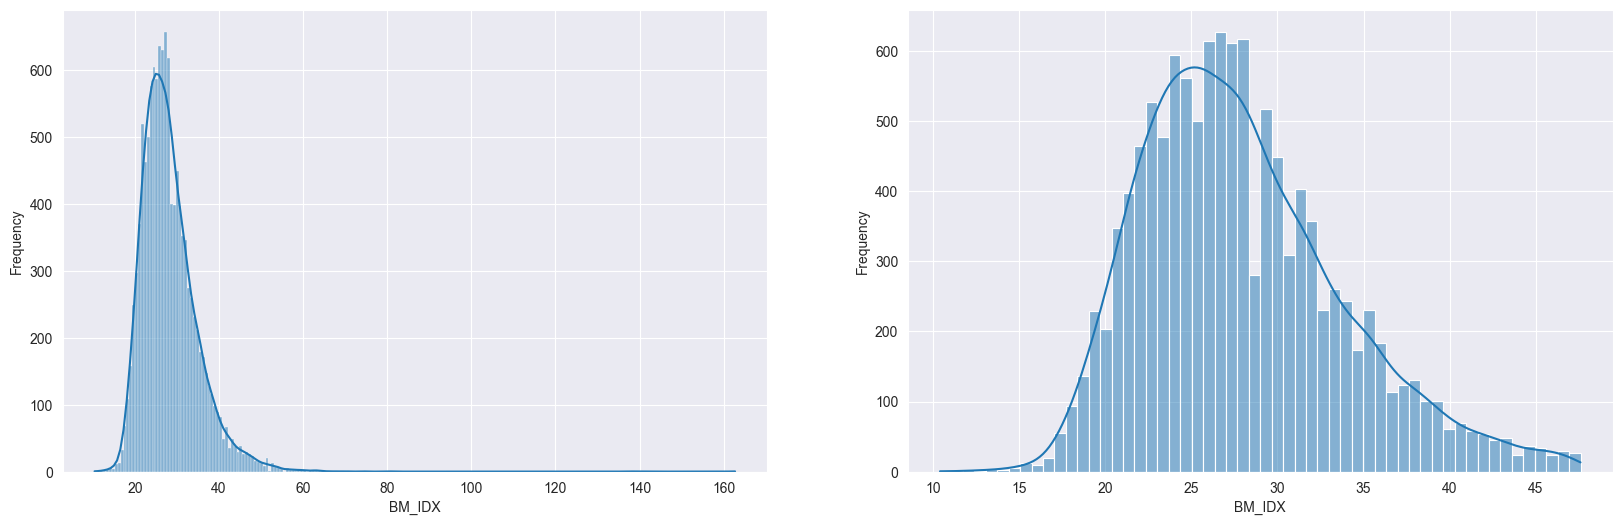

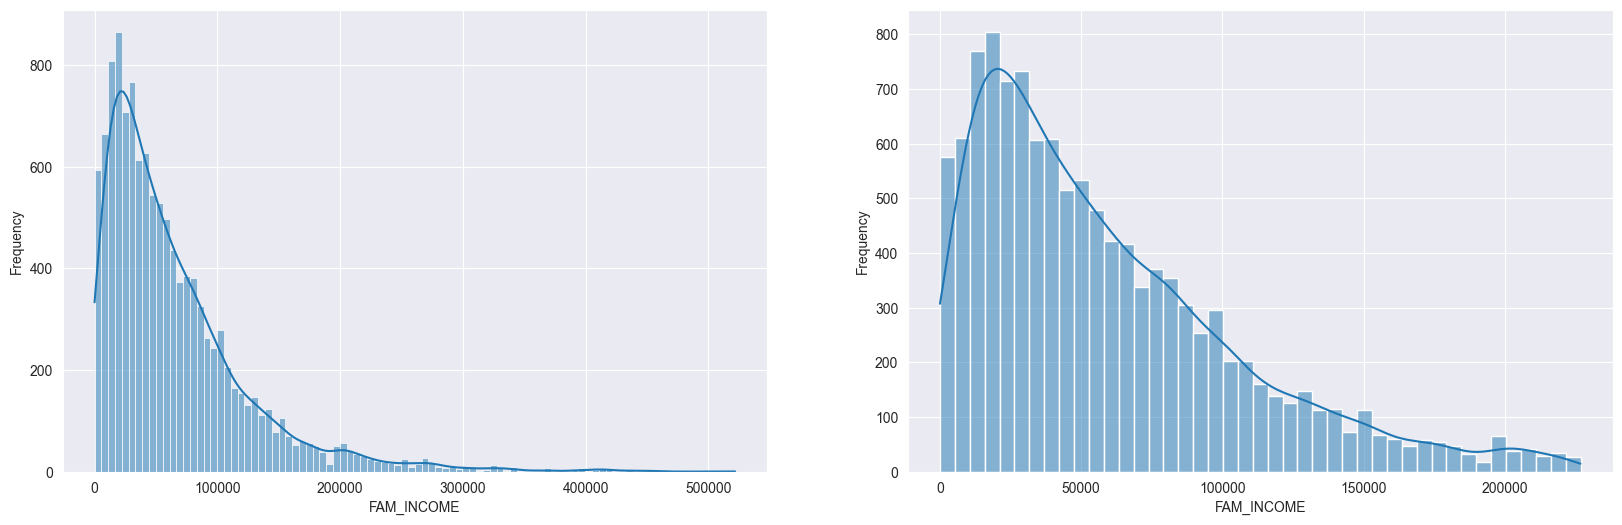

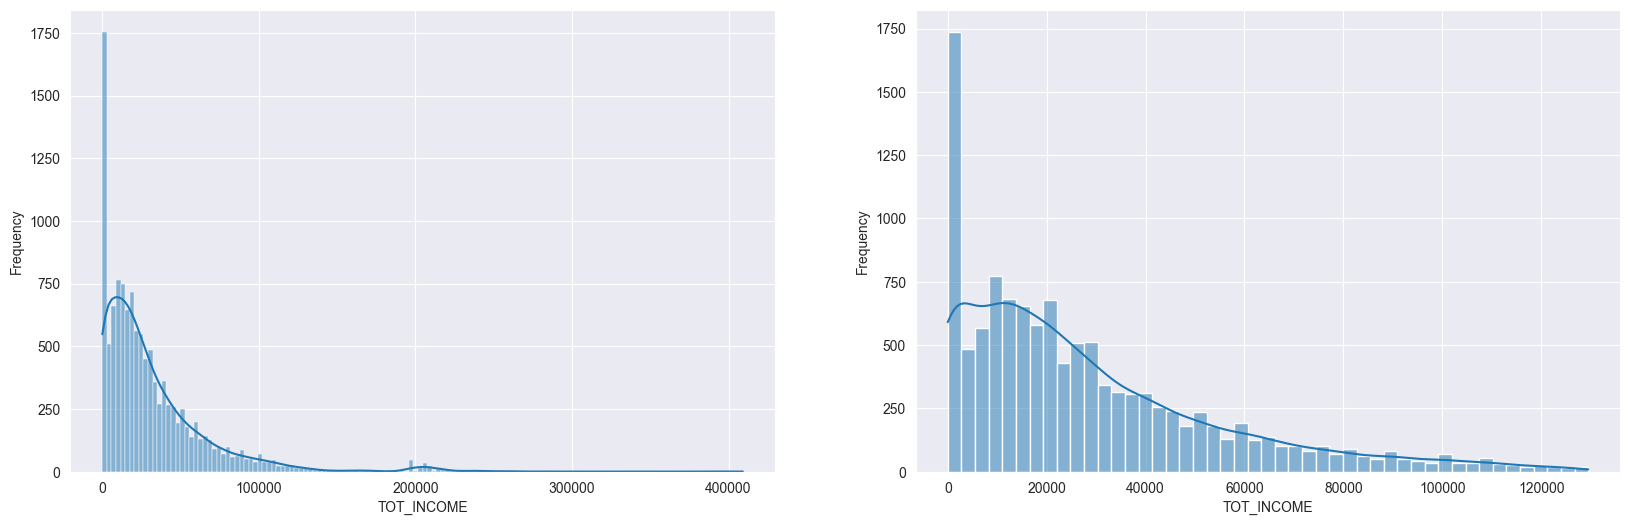

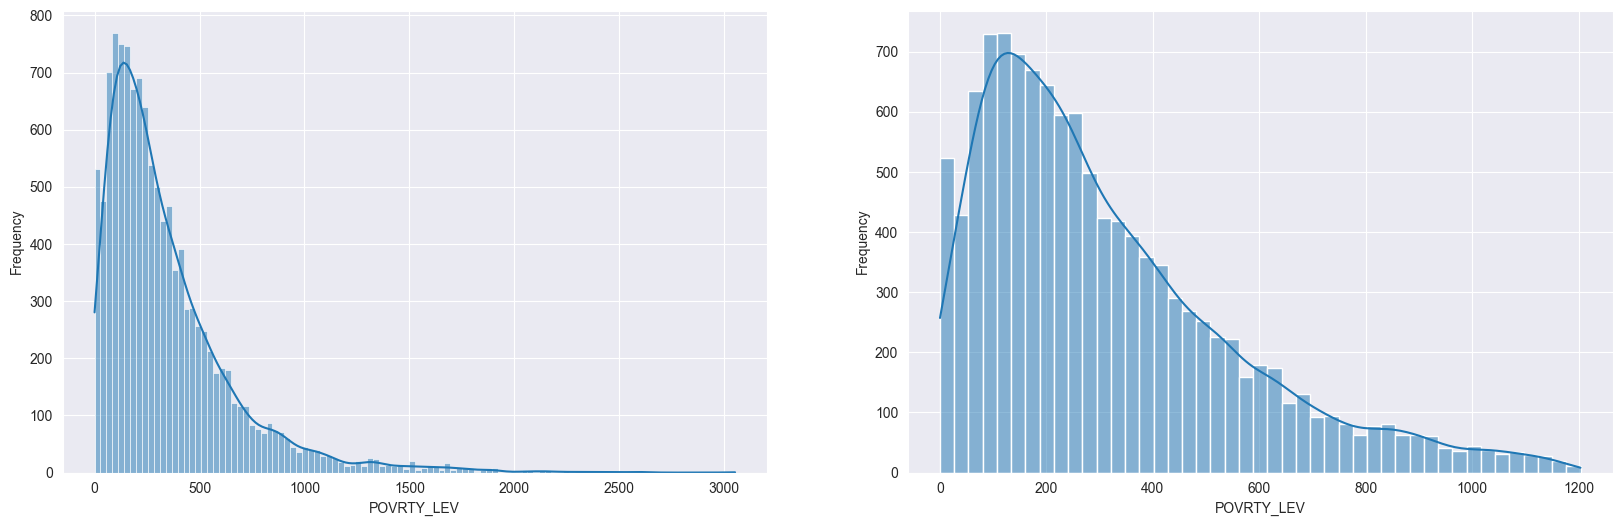

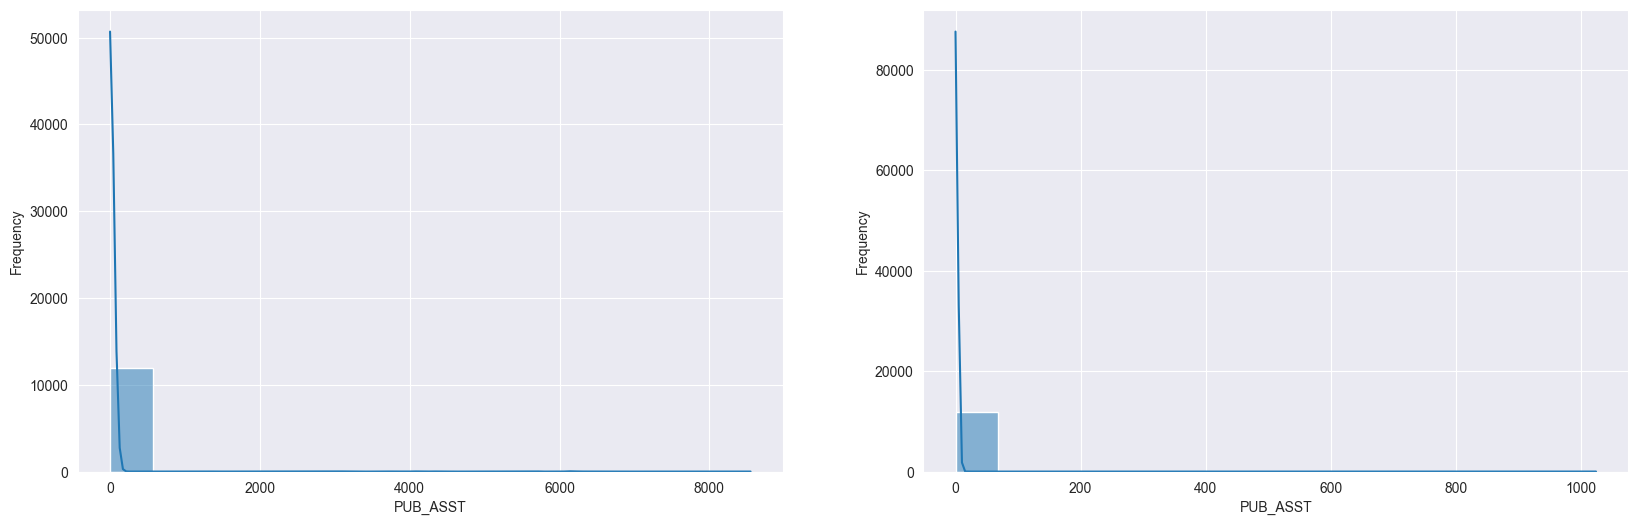

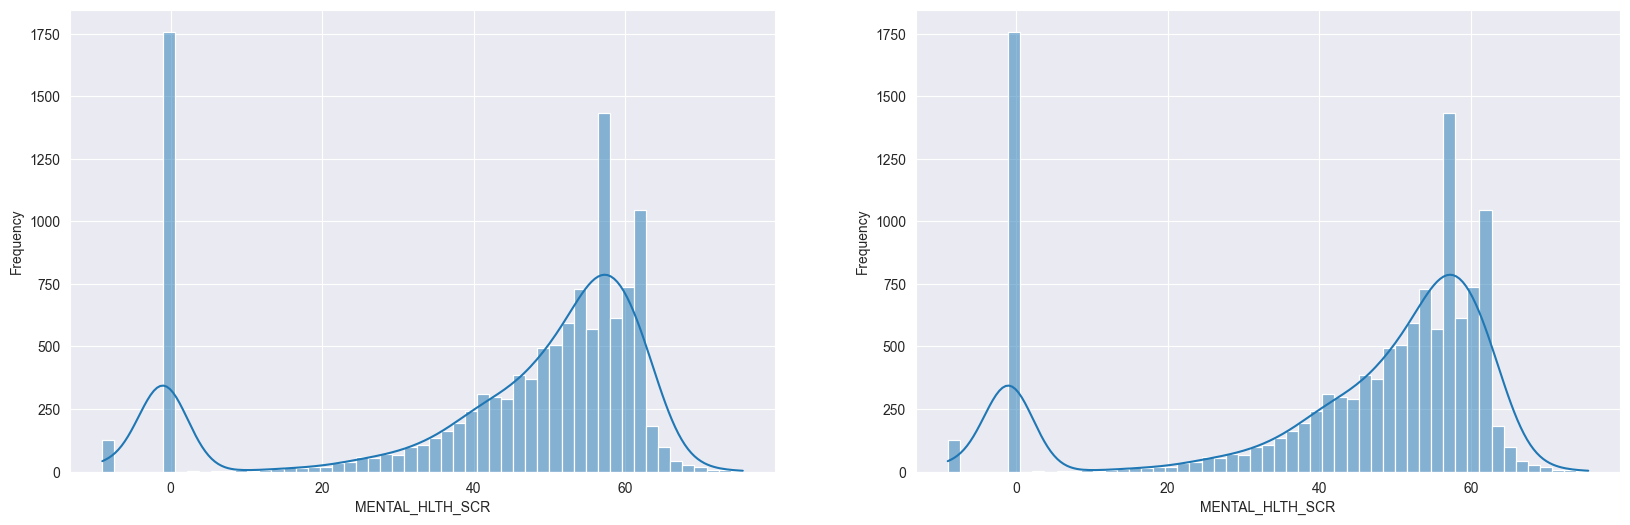

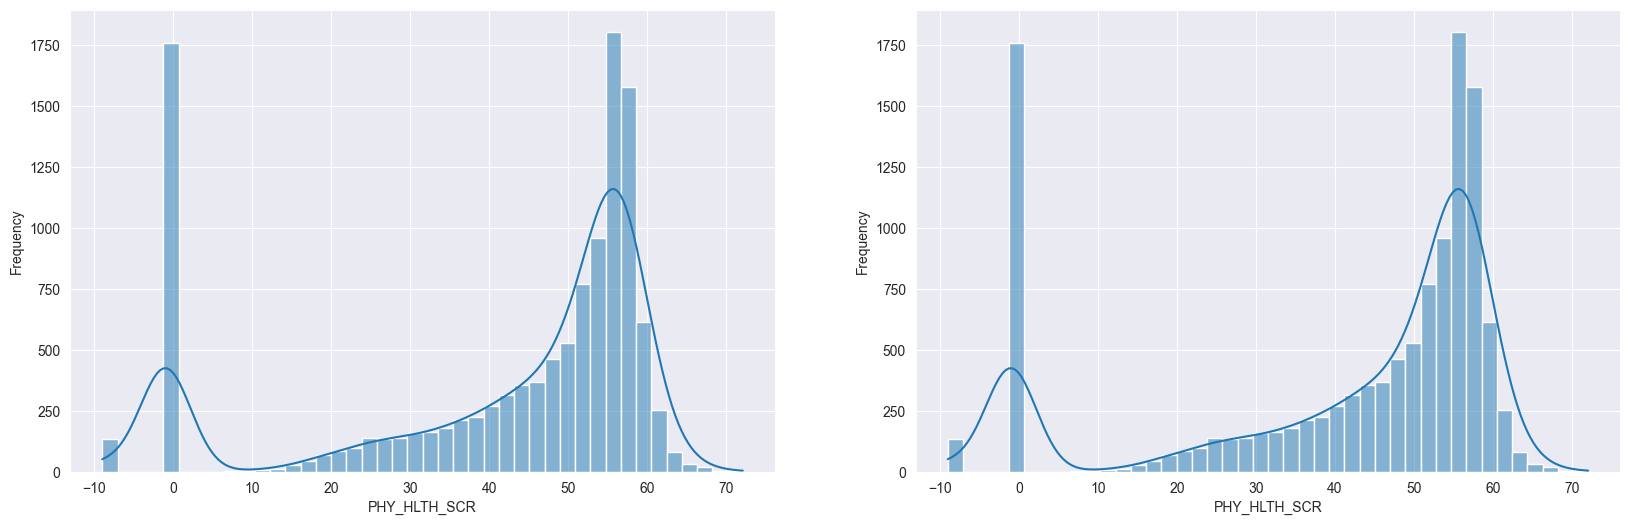

In [13]:
# Outlier detection and removal for continuous features
def remove_outliers(X_train, y_train, threshold=3):
    for feature in continuous_features:
        z_scores = np.abs((X_train[feature] - X_train[feature].median()) / X_train[feature].std())
        outliers = X_train[z_scores > threshold].index
        X_train.drop(outliers, inplace=True)
        y_train.drop(outliers, inplace=True)
        print(f"Removed {len(outliers)} outliers from {feature}")

    return X_train

# print outlier values for continuous features without dropping
def print_outliers(X_train, threshold=5):
    for feature in continuous_features:
        z_scores = np.abs((X_train[feature] - X_train[feature].median()) / X_train[feature].std())
        outliers = X_train[z_scores > threshold]
        print(f"Median for {feature}: {X_train[feature].median()}")
        print(f"Outliers for {feature}: {outliers[feature].values}")

# Plot distribution of specified continuous features
def plot_continuous_features(X_train, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(X_train[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

# Plot distribution of continuous features before and after outlier removal next to each other
def plot_outliers(X_train, threshold=3):
    for feature in continuous_features:
        plt.figure(figsize=(20, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(X_train[feature], kde=True)
        plt.xlabel(feature)
        plt.ylabel("Frequency")

        z_scores = np.abs((X_train[feature] - X_train[feature].median()) / X_train[feature].std())
        outliers = X_train[z_scores > threshold]

        plt.subplot(1, 2, 2)
        sns.histplot(X_train[feature][~X_train.index.isin(outliers.index)], kde=True)
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        
        if feature=='BM_IDX':
            plt.savefig('bmi_distribution.pdf', bbox_inches='tight')

        

plot_outliers(X_train_class, 3)
# Apply the function to the classification data
remove_outliers(X_train_class, y_train_class)
# Apply the function to the regression data
remove_outliers(X_train_reg, y_train_reg)
#save the graph of the BMI IDX distribution before and after outlier removal


##### Step 3e: Standard Scaling for Continuous Features

In [12]:
scaler_class = StandardScaler()
X_train_class[continuous_features] = scaler_class.fit_transform(X_train_class[continuous_features])
X_val_class[continuous_features] = scaler_class.transform(X_val_class[continuous_features])
X_test_class[continuous_features] = scaler_class.transform(X_test_class[continuous_features])

scaler_reg = StandardScaler()
X_train_reg[continuous_features] = scaler_reg.fit_transform(X_train_reg[continuous_features])
X_val_reg[continuous_features] = scaler_reg.transform(X_val_reg[continuous_features])
X_test_reg[continuous_features] = scaler_reg.transform(X_test_reg[continuous_features])

#### Step 4: Feature Selection

##### Step 4a: Unsupservised Feature Selection using Correlation Matrix

In [20]:
def drop_highly_correlated_features(X_train, X_val, X_test, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable, threshold=0.7, apply_flag=False):
    # Calculate the correlation matrix
    X_train_dropped_features = X_train.copy(deep=True)
    X_val_dropped_features = X_val.copy(deep=True)
    X_test_dropped_features = X_test.copy(deep=True)
    categorical_features_drop = copy.deepcopy(categorical_features)
    discrete_features_drop = copy.deepcopy(discrete_features)
    continuous_features_drop = copy.deepcopy(continuous_features)
    discrete_features_missing_drop = copy.deepcopy(discrete_features_missing)
    continuous_features_missing_drop = copy.deepcopy(continuous_features_missing)
    discrete_features_inapplicable_drop = copy.deepcopy(discrete_features_inapplicable)
    continuous_features_inapplicable_drop = copy.deepcopy(continuous_features_inapplicable)
    
    correlation_matrix = X_train_dropped_features[categorical_features_drop + discrete_features_drop + continuous_features_drop].corr()

    # Identify highly correlated features
    high_corr = correlation_matrix[correlation_matrix > threshold]
    high_corr = high_corr[high_corr < 1]
    high_corr = high_corr.dropna(axis=1, how='all')
    high_corr = high_corr.dropna(axis=0, how='all')

    # Store pairs of highly correlated features
    corr_map = {}
    if not high_corr.empty:
        for col in high_corr.columns:
            correlated_cols = high_corr[col].dropna()
            for index, value in correlated_cols.items():
                if (col, index) not in corr_map and (index, col) not in corr_map:
                    corr_map[(col, index)] = value

        # Sort the correlated pairs by correlation value
        corr_map = dict(sorted(corr_map.items(), key=lambda item: item[1], reverse=True))

        # Find the number of times a feature is correlated with other features
        feature_map = {}
        for key in corr_map.keys():
            if key[0] in feature_map:
                feature_map[key[0]] += 1
            else:
                feature_map[key[0]] = 1
            if key[1] in feature_map:
                feature_map[key[1]] += 1
            else:
                feature_map[key[1]] = 1

        feature_map = dict(sorted(feature_map.items(), key=lambda item: item[1], reverse=True))

        # Keep only one feature from each correlated pair
        dropped_corr_features = set()
        kept_features = set()

        for feature, _ in feature_map.items():
            if feature not in dropped_corr_features:
                correlated_pairs = [pair for pair in corr_map.keys() if feature in pair]
                for pair in correlated_pairs:
                    feat1, feat2 = pair
                    if feat1 not in dropped_corr_features and feat2 not in dropped_corr_features:
                        if feature_map[feat1] > feature_map[feat2]:
                            dropped_corr_features.add(feat2)
                            if feat2 + '__missing' in X_train_dropped_features.columns:
                                dropped_corr_features.add(feat2 + '__missing')
                            if feat2 + '__inapplicable' in X_train_dropped_features.columns:
                                dropped_corr_features.add(feat2 + '__inapplicable')
                            kept_features.add(feat1)
                        else:
                            dropped_corr_features.add(feat1)
                            if feat1 + '__missing' in X_train_dropped_features.columns:
                                dropped_corr_features.add(feat1 + '__missing')
                            if feat1 + '__inapplicable' in X_train_dropped_features.columns:
                                dropped_corr_features.add(feat1 + '__inapplicable')
                            kept_features.add(feat2)

        # Drop the correlated features from the training and test data
        X_train_dropped_features.drop(list(dropped_corr_features), axis=1, inplace=True)
        X_val_dropped_features.drop(list(dropped_corr_features), axis=1, inplace=True)
        X_test_dropped_features.drop(list(dropped_corr_features), axis=1, inplace=True)
        print(f"\nDropped Correlated Features: {list(dropped_corr_features)}")

        # Update the feature lists
        for feat in dropped_corr_features:
            if feat in categorical_features_drop:
                categorical_features_drop.remove(feat)
            elif feat in discrete_features_drop:
                discrete_features_drop.remove(feat)
            elif feat in continuous_features_drop:
                continuous_features_drop.remove(feat)
            elif feat in discrete_features_missing_drop:
                discrete_features_missing_drop.remove(feat)
            elif feat in continuous_features_missing_drop:
                continuous_features_missing_drop.remove(feat)
            elif feat in discrete_features_inapplicable_drop:
                discrete_features_inapplicable_drop.remove(feat)
            elif feat in continuous_features_inapplicable_drop:
                continuous_features_inapplicable_drop.remove(feat)
                
    if apply_flag:
        return X_train_dropped_features, X_val_dropped_features, X_test_dropped_features, categorical_features_drop, discrete_features_drop, continuous_features_drop, discrete_features_missing_drop, continuous_features_missing_drop, discrete_features_inapplicable_drop, continuous_features_inapplicable_drop

    return X_train_dropped_features, X_val_dropped_features, X_test_dropped_features
# from lightgbm import LGBMClassifier
# # Hyperparameter tuning for the correlation threshold to find the optimal value
# # create 2 plots number of features dropped against threshold and f1 score against threshold
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.set_xlabel('Threshold')
# ax1.set_ylabel('Number of Features Dropped', color='r')
# ax2.set_ylabel('F1 Score', color='b')
# 
# # loop through threshold values from 0.5 to 1.0 in steps of 0.05
# thresholds = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
# y_num_dropped_features = []
# y_f1_score = []
# for i in thresholds:
#     threshold = i
#     print(f"\nThreshold: {threshold}")
#     X_train_class_dropped_features, X_val_class_dropped_features, X_test_class_dropped_features = drop_highly_correlated_features(X_train_class, X_val_class, X_test_class, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable, threshold, apply_flag=False)
#     #X_train_reg_test, X_test_reg_test = drop_highly_correlated_features(X_train_reg.copy(deep=True), X_test_reg.copy(deep=True), threshold)
#     # plot number of features dropped due to correlation against threshold
#     print(f"Number of features dropped for classification: {X_train_class.shape[1] - X_train_class_dropped_features.shape[1]}")
#     #print(f"Number of features dropped for regression: {X_train_reg.shape[1] - X_train_reg_test.shape[1]}")
#     # plot number of features dropped against threshold on subplot 1
#     y_num_dropped_features.append(X_train_class.shape[1] - X_train_class_dropped_features.shape[1])
#     #plt.plot(threshold, X_train_reg.shape[1] - X_train_reg_test.shape[1], 'bo')
#     # calculate f1 score for classification
#     clf = LGBMClassifier()
#     clf.fit(X_train_class_dropped_features, y_train_class)
#     y_pred_class = clf.predict(X_test_class_dropped_features)
#     f1 = f1_score(y_test_class, y_pred_class, average='weighted')
#     f1 = round(f1, 4)
#     print(f"F1 Score: {f1}")
#     # plot f1 score against threshold on subplot 2
#     y_f1_score.append(f1)
# 
# # plot the 2 plots
# ax1.plot(thresholds, y_num_dropped_features, 'r-')
# ax2.plot(thresholds, y_f1_score, 'b-')
# # annotate points
# # 'for i, txt in enumerate(y_num_dropped_features):
# #     ax1.annotate(txt, (thresholds[i], y_num_dropped_features[i]))
# # for i, txt in enumerate(y_f1_score):
# #     ax2.annotate(txt, (thresholds[i], y_f1_score[i]))'
# plt.title('Number of Features Dropped and F1 Score against Threshold')
# plt.xlabel('Threshold')
# plt.ylabel('Number of Features Dropped')
# plt.ylabel('F1 Score')
# plt.show()

In [21]:
# Apply the function to the classification data
X_train_class, X_val_class, X_test_class, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable = drop_highly_correlated_features(X_train_class, X_val_class, X_test_class, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable, threshold=0.7, apply_flag=True)
# Apply the function to the regression data
X_train_reg, X_val_reg, X_test_reg, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable = drop_highly_correlated_features(X_train_reg, X_val_reg, X_test_reg, categorical_features, discrete_features, continuous_features, discrete_features_missing, continuous_features_missing, discrete_features_inapplicable, continuous_features_inapplicable, threshold=0.7, apply_flag=True)

X_train_class


Dropped Correlated Features: ['DIAB_MED__-1', 'MIL_ACTIV_DUTY__1', 'ADV_BOOST_SEAT__1', 'BLIND__2', 'PROB_WKIDS__inapplicable', 'EDU_DEG', 'OVR_FEEL_14__inapplicable', 'FOOD_STMP_MNTHS__inapplicable', 'EMPLYMT__1', 'DIFFIC_HEAR__-8', 'OVR_FEEL_14__missing', 'ACTIV_LIM__-7', 'MENTAL_HLTH_SCR__inapplicable', 'UNABL_PRES_MED__-1', 'DEAF__2', 'EDU_DEG__missing', 'DISPSN_STAT__42', 'MENTAL_HLTH_SCR', 'FOOD_STMP_MNTHS', 'ADV_LAP_BLT__1', 'PROB_WKIDS__missing', 'EDU_DEG__inapplicable', 'DIFFIC_SEE__-7', 'EMPLYR_INS__-7', 'UNION_STAT__2', 'SOCIAL_LIM__-7', 'MULT_HIGHBP__1', 'ADV_DNTL_CKP__1', 'ADV_DNTL_CKP__-1', 'HOUSEWRK_LIM__1', 'DIAB_KIDNY__2', 'HON_DISCHARGE__4', 'ARTHR_DIAG__2', 'ADV_NO_FAT_FOOD__-7', 'FAM_INCOME', 'DIAB_MED__1', 'HEAR_AID__-1', 'MIL_ACTIV_DUTY__4', 'EMPLYMT__4', 'DIAB_KIDNY__-1', 'ADHD_DIAG__1', 'PROB_WKIDS', 'FOOD_STMP_MNTHS__missing', 'DELAY_PRESCR_MED__-1', 'ADV_EAT_HLTHY__-1', 'MULT_HIGHBP__-1', 'DIAB_INSLN__2', 'SCHOOL_LIM__2', 'POVRTY_CAT', 'DELAY_PRESCR_MED__-8',

,RACE,SEX,PANEL,WEIGHT,HEALTH_STAT,MENTAL_HLTH,REGION,MARITAL_STAT,AGE,TOT_INCOME,...,LAST_FLU_VAC__missing,LAST_REG_CKP__missing,DAYS_ILL_NOWORK__missing,DAYS_ILL_NOWORK__inapplicable,DAYS_ILL_NOSCHL__missing,DAYS_ILL_NOSCHL__inapplicable,PHY_HLTH_SCR__missing,PHY_HLTH_SCR__inapplicable,OVR_FEEL_30__missing,OVR_FEEL_30__inapplicable
9839,0,1,19,4979.703734,1.0,1.0,4,1,47.0,1.062137,...,0,0,0,0,0,1,0,0,0,0
9680,0,1,19,6017.492189,1.0,3.0,3,5,28.0,0.052035,...,0,0,0,0,0,1,0,0,0,0
7093,1,2,19,5608.133271,2.0,2.0,2,2,85.0,-0.883206,...,0,0,1,0,0,1,0,0,0,0
11293,0,2,20,2032.454693,2.0,2.0,3,4,26.0,-0.154877,...,0,0,0,0,0,1,0,0,0,0
7219,1,1,19,1955.183222,3.0,2.0,2,1,31.0,-0.320406,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,20,22010.003946,2.0,1.0,2,5,26.0,0.507241,...,0,0,0,0,0,1,0,1,0,1
13418,1,1,19,24941.073377,4.0,4.0,1,3,77.0,3.151614,...,0,0,0,1,0,1,0,0,0,0
5390,0,2,19,2935.017236,2.0,3.0,4,1,52.0,-1.106671,...,0,0,0,1,0,1,0,0,0,0
860,0,2,20,4153.502085,1.0,1.0,1,1,35.0,-0.485935,...,0,0,0,0,0,1,0,0,0,0


##### Step 4b: Supervised Feature Selection using SelectPercentile

In [ ]:
X_train_class.corrwith(y_train_class, method='spearman').sort_values(ascending=False)

In [22]:
def select_top_features(X_train, y_train, score_func_cat, score_func_num, percentile_cat, percentile_num):
    # Select top categorical features
    fs_cat = SelectPercentile(score_func=score_func_cat, percentile=percentile_cat)
    fs_cat.fit_transform(X_train[categorical_features], y_train)
    cols_cat = fs_cat.get_support(indices=True)
    selected_cat_features = X_train[categorical_features].columns[cols_cat]
    print(f"Best Categorical Features Selected: {len(selected_cat_features)}")
    print(selected_cat_features)
    
    # Select top numerical features
    fs_num = SelectPercentile(score_func=score_func_num, percentile=percentile_num)
    fs_num.fit_transform(X_train[continuous_features + discrete_features], y_train)
    cols_num = fs_num.get_support(indices=True)
    selected_num_features = X_train[continuous_features + discrete_features].columns[cols_num]
    print(f"Best Numerical Features Selected: {len(selected_num_features)}")
    print(selected_num_features)
    
    # Add missing and inapplicable indicator columns to selected numerical features
    selected_num_features = list(selected_num_features) + [col + '__missing' for col in selected_num_features if col + '__missing' in X_train.columns] + [col + '__inapplicable' for col in selected_num_features if col + '__inapplicable' in X_train.columns]
    
    # Combine selected features
    selected_features = list(selected_cat_features) + list(selected_num_features)
    
    # Return the dataframe with selected features
    return X_train[selected_features], selected_features

In [23]:
# from lightgbm import LGBMClassifier
# from sklearn.linear_model import BayesianRidge
# # Hyperparameter tuning for the percentile values to find the optimal values
# # create 2 plot one with (cat_percentile, num_percentile) on x-axis and f1 score on y-axis and one with (cat_percentile, num_percentile) on x-axis and number of features selected on y-axis
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# 
# # loop through percentile values from 10 to 100 in steps of 5 for both categorical and numerical features
# cat_percentiles = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
# num_percentiles = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
# percentile_pairs = [(i, j) for i in cat_percentiles for j in num_percentiles]
# y_num_features = []
# y_f1_score = []
# for i, j in percentile_pairs:
#     print(f"\nPercentile for Categorical Features: {i}")
#     print(f"Percentile for Numerical Features: {j}")
#     X_train_class_selected, selected_features = select_top_features(X_train_reg.copy(deep=True), y_train_reg.copy(deep=True), score_func_cat=f_classif, score_func_num=f_regression, percentile_cat=i, percentile_num=j)
#     print(f"Number of Features Selected: {len(selected_features)}")
#     y_num_features.append(len(selected_features))
#     # calculate rmse
#     clf = BayesianRidge()
#     clf.fit(X_train_class_selected, y_train_reg)
#     y_pred_reg = clf.predict(X_val_reg[selected_features])
#     f1_score = mean_squared_error(y_val_reg, y_pred_reg, squared=False)
#     f1_score = round(f1_score, 4)
#     print(f"RMSE: {f1_score}")
#     y_f1_score.append(f1_score)


In [24]:
# # Create the plot
# fig, ax1 = plt.subplots(figsize=(14, 6))
# 
# # Convert percentile pairs to string labels
# percentile_labels = [f'({i},{j})' for i, j in percentile_pairs]
# 
# # Plot F1 score
# ax1.plot(range(len(percentile_pairs)), y_f1_score, 'r-', label='F1 Score')
# ax1.set_xlabel('Percentile (Categorical, Numerical) Features')
# ax1.set_ylabel('F1 Score', color='r')
# ax1.tick_params(axis='y', labelcolor='r')
# 
# # Plot number of features selected
# ax2 = ax1.twinx()
# ax2.plot(range(len(percentile_pairs)), y_num_features, 'b-', label='Number of Features Selected')
# ax2.set_ylabel('Number of Features Selected', color='b')
# ax2.tick_params(axis='y', labelcolor='b')
# 
# # Set x-ticks to the string labels
# ax1.set_xticks(range(len(percentile_pairs)))
# ax1.set_xticklabels(percentile_labels, rotation=90)
# 
# plt.title('F1 Score and Number of Features Selected against Percentile Values')
# plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
# plt.show()
# 
# # Find the index of the highest F1 score
# max_f1_index = y_f1_score.index(min(y_f1_score))
# 
# # Get the corresponding percentile pair
# best_percentiles = percentile_pairs[max_f1_index]
# best_f1_score = y_f1_score[max_f1_index]
# print(f"Best Percentile Pair: {best_percentiles}")
# print(f"Best F1 Score: {best_f1_score}")

In [25]:
# Apply the feature selection process to the classification dataset
X_train_class, selected_class_features = select_top_features(X_train_class, y_train_class, score_func_cat=chi2, score_func_num=f_classif, percentile_cat=70, percentile_num=95)

# Apply the feature selection process to the regression dataset
X_train_reg, selected_reg_features = select_top_features(X_train_reg, y_train_reg, score_func_cat=f_classif, score_func_num=f_regression, percentile_cat=35, percentile_num=40)


# Apply the same selection to the validation and test sets
X_val_class = X_val_class[selected_class_features]
X_val_reg = X_val_reg[selected_reg_features]
X_test_class = X_test_class[selected_class_features]
X_test_reg = X_test_reg[selected_reg_features]

# Output the final selected features
print(f"Final Selected Features for Classification: {selected_class_features}")
print(f"Final Selected Features for Regression: {selected_reg_features}")

Best Categorical Features Selected: 166
Index(['STUDENT_STAT__-1', 'STUDENT_STAT__1', 'STUDENT_STAT__2',
       'STUDENT_STAT__3', 'EMPLYMT__3', 'OCCUP__1', 'OCCUP__3', 'OCCUP__4',
       'OCCUP__5', 'OCCUP__6',
       ...
       'ADHD_DIAG__2', 'DIFF_ERRND_ALN__1', 'DIFF_ERRND_ALN__2',
       'DIFFIC_HEAR__1', 'DIFFIC_HEAR__2', 'DIFFIC_SEE__-8', 'DIFFIC_SEE__1',
       'DIFFIC_SEE__2', 'SMOK__-1', 'SMOK__2'],
      dtype='object', length=166)
Best Numerical Features Selected: 25
Index(['BM_IDX', 'TOT_INCOME', 'POVRTY_LEV', 'PUB_ASST', 'PHY_HLTH_SCR',
       'PROB_WBHV', 'HEALTH_STAT', 'MENTAL_HLTH', 'FREQ_DNTL_CKP',
       'WHEN_ADV_BOOST_SEAT', 'WHEN_ADV_LAP_BLT', 'WHEN_LST_ASTHMA',
       'WHEN_ADV_EXERCISE', 'LAST_FLU_VAC', 'LAST_REG_CKP', 'TIME_LAST_PSA',
       'OVR_FEEL_30', 'AGE', 'AGE_DIAG_ADHD', 'NUM_PRESCR_MEDS', 'CHILD_SUPP',
       'DAYS_CAREOTHR_NOWORK', 'DAYS_ILL_NOWORK', 'FOOD_STMP_VAL',
       'NUM_DEP_OUT_REP_UNT'],
      dtype='object')
Best Categorical Features Sele

/Users/Youssef/.venvs/ml_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 69 116 150 181 226 232] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/Youssef/.venvs/ml_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/Youssef/.venvs/ml_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Task 1: Classification

#### LazyClassifier

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models_class, predictions_class = clf.fit(X_train_class, X_val_class, y_train_class, y_val_class)
    
print(models_class)

#### Specific Classifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

classifier = LGBMClassifier()
classifier.fit(X_train_class, y_train_class)

y_pred_binary = classifier.predict(X_test_class)

if submission:
    y_pred_val = classifier.predict(X_val_class)
    y_pred_val_binary = (y_pred_val > 0.5).astype(int)
    f1 = f1_score(y_val_class, y_pred_val_binary, average='weighted')
    print(f"F1 Score: {f1}")
    y_pred_original = le_utilization.inverse_transform(y_pred_binary.ravel())
    np.save(os.path.join('submission', f'{team_id}__{split}__clf_pred.npy'), y_pred_original)
else:
    f1 = f1_score(y_val_class, y_pred_binary, average='weighted')
    print(f"F1 Score: {f1}")

#### Neural Network

In [ ]:
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the number of models to train in the ensemble
n_models = 10

# Create a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.96
)

# List to store each model after training
models = []

# Training loop for multiple models
for i in range(n_models):
    print(f"Training model {i + 1}/{n_models}")
    
    # Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train_class.shape[1],)))
    model.add(Dense(32, activation='relu'))# Input layer specifying the input shape
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))  # Optional: helps prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # For binary classification, use 'sigmoid' activation

    # Compile the model
    optimizer = Adam(learning_rate=lr_schedule)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # Train the model
    model.fit(X_train_class, y_train_class, epochs=500, batch_size=7500, validation_split=0.2, verbose=1,
              callbacks=[early_stopping])

    # Append the trained model to the list
    models.append(model)

In [ ]:
# get model with best f1 score
best_f1 = 0
best_model = None
for model in models:
    y_pred = model.predict(X_val_class)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    f1 = f1_score(y_val_class, y_pred, average='weighted')
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        
print(f"Best F1 Score: {best_f1}")
        
y_pred = best_model.predict(X_test_class)
y_pred_binary = (y_pred > 0.5).astype(int)

if submission:
    y_pred_original = le_utilization.inverse_transform(y_pred_binary.ravel())
    np.save(os.path.join('submission', f'{team_id}__{split}__clf_pred.npy'), y_pred_original)
else:
    f1 = f1_score(y_test_class, y_pred_binary, average='weighted')
    print(f'Test F1 Score: {f1}')

### Task 2: Regression

#### LazyRegressor

In [13]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
    
models_reg, predictions_reg = reg.fit(X_train_reg, X_val_reg, y_train_reg, y_val_reg)
    
print(models_reg)

 98%|█████████▊| 41/42 [03:49<00:03,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3392
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 284
[LightGBM] [Info] Start training from score 4861.400333


100%|██████████| 42/42 [03:49<00:00,  5.47s/it]

                                                              Adjusted R-Squared  \
Model                                                                              
HistGradientBoostingRegressor                                               0.24   
LassoCV                                                                     0.24   
LassoLarsCV                                                                 0.24   
LassoLarsIC                                                                 0.24   
LassoLars                                                                   0.24   
OrthogonalMatchingPursuitCV                                                 0.24   
OrthogonalMatchingPursuit                                                   0.24   
GradientBoostingRegressor                                                   0.24   
LGBMRegressor                                                               0.23   
Lasso                                                                       

#### Specific Regressor

In [ ]:
from sklearn.linear_model import BayesianRidge

regressor = BayesianRidge()
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)

if submission:
    y_pred_reg = regressor.predict(X_val_reg)
    rmse = mean_squared_error(y_val_reg, y_pred_reg, squared=False)
    print(f"RMSE: {rmse}")
    np.save(os.path.join('submission', f'{team_id}__{split}__reg_pred.npy'), y_pred_reg)
else:
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    print(f"RMSE: {rmse}")

#### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the number of models to train in the ensemble
n_models = 10

# Create a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.05,
    decay_steps=10000,
    decay_rate=0.9
)

# List to store each model after training
models = []

# Training loop for multiple models
for i in range(n_models):
    print(f"Training model {i + 1}/{n_models}")
    
    # Define the model architecture
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_reg.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))  # Optional: helps prevent overfitting
    model.add(Dense(1, activation='linear'))  # For regression, use 'linear' activation

    # Compile the model
    optimizer = Adam(learning_rate=lr_schedule)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # Train the model
    model.fit(X_train_reg, y_train_reg, epochs=500, batch_size=7500, validation_split=0.2, verbose=1,
              callbacks=[early_stopping])

    # Append the trained model to the list
    models.append(model)

In [ ]:
# get model with best rmse
best_rmse = float('inf')
best_model = None
for model in models:
    y_pred = model.predict(X_val_reg)
    rmse = mean_squared_error(y_val_reg, y_pred, squared=False)
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        
print(f"Best RMSE: {best_rmse}")
        
y_pred = best_model.predict(X_test_reg)

if submission:
    np.save(os.path.join('submission', f'{team_id}__{split}__reg_pred.npy'), y_pred)
else:
    rmse = mean_squared_error(y_test_reg, y_pred, squared=False)
    print(f'Test RMSE: {rmse}')

### Fairness Evaluation

In [ ]:
sensitive_features = ["RACE", "SEX", "REGION", "MARITAL_STAT"]
sensitive_features_class = [col for col in X_train_class.columns for feat in sensitive_features if feat in col]
sensitive_features_reg = [col for col in X_train_reg.columns for feat in sensitive_features if feat in col]

print(f"Sensitive Features for Classification: {sensitive_features_class}")
print(f"Sensitive Features for Regression: {sensitive_features_reg}")

# drop sensitive features from the classification and regression datasets
X_train_class_fair = X_train_class.drop(sensitive_features_class, axis=1)
X_test_class_fair = X_test_class.drop(sensitive_features_class, axis=1)
X_train_reg_fair = X_train_reg.drop(sensitive_features_reg, axis=1)
X_test_reg_fair = X_test_reg.drop(sensitive_features_reg, axis=1)

# train classification and regression models on the datasets without sensitive features and predict on the test data
classifier_unfair = LGBMClassifier()
classifier_unfair.fit(X_train_class, y_train_class)
y_pred_class_unfair = classifier_unfair.predict(X_test_class)

classifier_fair = LGBMClassifier()
classifier_fair.fit(X_train_class_fair, y_train_class)
y_pred_class_fair = classifier_fair.predict(X_test_class_fair)

regressor_unfair = BayesianRidge()
regressor_unfair.fit(X_train_reg, y_train_reg)
y_pred_reg_unfair = regressor_unfair.predict(X_test_reg)

regressor_fair = BayesianRidge()
regressor_fair.fit(X_train_reg_fair, y_train_reg)
y_pred_reg_fair = regressor_fair.predict(X_test_reg_fair)

if submission:
    np.save(os.path.join('submission', f'{team_id}__{split}__clf_lgbm_pred_unfair.npy'), y_pred_class_unfair)
    np.save(os.path.join('submission', f'{team_id}__{split}__clf_lgbm_pred_fair.npy'), y_pred_class_fair)
    np.save(os.path.join('submission', f'{team_id}__{split}__reg_ridge_pred_unfair.npy'), y_pred_reg_unfair)
    np.save(os.path.join('submission', f'{team_id}__{split}__reg_ridge_pred_fair.npy'), y_pred_reg_fair)

# calculate f1 score and rmse for the fair models
f1_class_unfair = f1_score(y_test_class, y_pred_class_unfair, average='weighted')
f1_class_fair = f1_score(y_test_class, y_pred_class_fair, average='weighted')
rmse_reg_unfair = mean_squared_error(y_test_reg, y_pred_reg_unfair, squared=False)
rmse_reg_fair = mean_squared_error(y_test_reg, y_pred_reg_fair, squared=False)

print(f"Unfair Classification F1 Score: {f1_class_unfair}")
print(f"Fair Classification F1 Score: {f1_class_fair}")
print(f"Unfair Regression RMSE: {rmse_reg_unfair}")
print(f"Fair Regression RMSE: {rmse_reg_fair}")

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_fairness_metrics(X_test, y_test, y_pred, sensitive_features):
    metrics = {}
    
    for feature in sensitive_features:
        if feature in X_test.columns:
            unique_values = X_test[feature].unique()
        else:
            unique_values = []

        # Demographic Parity
        dp_dict = {}
        if len(unique_values) > 0:
            for value in unique_values:
                dp_dict[value] = np.mean(y_pred[X_test[feature] == value])
        metrics[f"Demographic Parity - {feature}"] = dp_dict
        
        # Equalized Odds
        eo_dict = {}
        if len(unique_values) > 0:
            for value in unique_values:
                y_true = y_test[X_test[feature] == value]
                y_pred_group = y_pred[X_test[feature] == value]
                
                if len(set(y_true)) < 2 or len(set(y_pred_group)) < 2:
                    # If there are not enough classes, skip calculation
                    eo_dict[value] = {"TPR": None, "FPR": None}
                else:
                    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_group).ravel()
                    tpr = tp / (tp + fn)  # True Positive Rate
                    fpr = fp / (fp + tn)  # False Positive Rate
                    eo_dict[value] = {"TPR": tpr, "FPR": fpr}
        metrics[f"Equalized Odds - {feature}"] = eo_dict
        
        # Disparate Impact Ratio
        di_dict = {}
        if len(unique_values) > 1:
            privileged_group = unique_values[0]
            unprivileged_group = unique_values[1]
            privileged_outcome = np.mean(y_pred[X_test[feature] == privileged_group])
            unprivileged_outcome = np.mean(y_pred[X_test[feature] == unprivileged_group])
            di_ratio = unprivileged_outcome / privileged_outcome if privileged_outcome != 0 else None
            di_dict[f"{unprivileged_group}/{privileged_group}"] = di_ratio
        metrics[f"Disparate Impact Ratio - {feature}"] = di_dict

    return metrics


In [ ]:
fairness_metrics_class_unfair = calculate_fairness_metrics(X_test_class, y_test_class, y_pred_class_unfair, sensitive_features_class)

print("Unfair Classification Fairness Metrics:")
for metric, value in fairness_metrics_class_unfair.items():
    print(f"{metric}: {value}")

In [ ]:
# plot the fairness metrics for the classification model
